# Problem Statement

### To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[]


In [3]:
! rm -rf /kaggle/working/data/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
data_dir_train = pathlib.Path(r'C:\Users\Sakshi\OneDrive\Desktop\Skin Data\Skin cancer ISIC The International Skin Imaging Collaboration\Train')
data_dir_test = pathlib.Path(r'C:\Users\Sakshi\OneDrive\Desktop\Skin Data\Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [6]:
batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed)

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


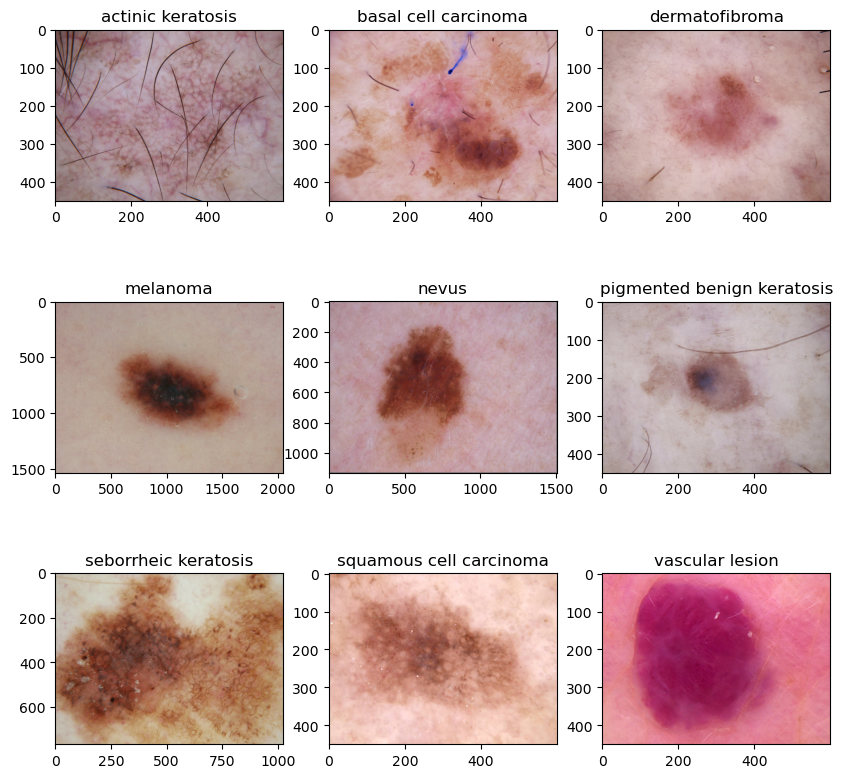

In [11]:
num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(3,3,i+1)
  image = img.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [12]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)


In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling \
                    (1.0/255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [15]:
opt = Adam(lr=0.001)
model.compile(optimizer= opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

In [17]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 [==============================] - 56s 943ms/step - loss: 2.0192 - accuracy: 0.2204 - val_loss: 1.9629 - val_accuracy: 0.2506
Epoch 2/25
56/56 [==============================] - 50s 890ms/step - loss: 1.9204 - accuracy: 0.2757 - val_loss: 1.7907 - val_accuracy: 0.3602
Epoch 3/25
56/56 [==============================] - 50s 889ms/step - loss: 1.7816 - accuracy: 0.3393 - val_loss: 1.7412 - val_accuracy: 0.3423
Epoch 4/25
56/56 [==============================] - 50s 891ms/step - loss: 1.6988 - accuracy: 0.3739 - val_loss: 1.7271 - val_accuracy: 0.3356
Epoch 5/25
56/56 [==============================] - 50s 888ms/step - loss: 1.6388 - accuracy: 0.3973 - val_loss: 1.5685 - val_accuracy: 0.4474
Epoch 6/25
56/56 [==============================] - 50s 896ms/step - loss: 1.5472 - accuracy: 0.4470 - val_loss: 1.6742 - val_accuracy: 0.3937
Epoch 7/25
56/56 [==============================] - 53s 946ms/step - loss: 1.5458 - accuracy: 0.4526 - val_loss: 1.5207 - val_accuracy: 0.4497

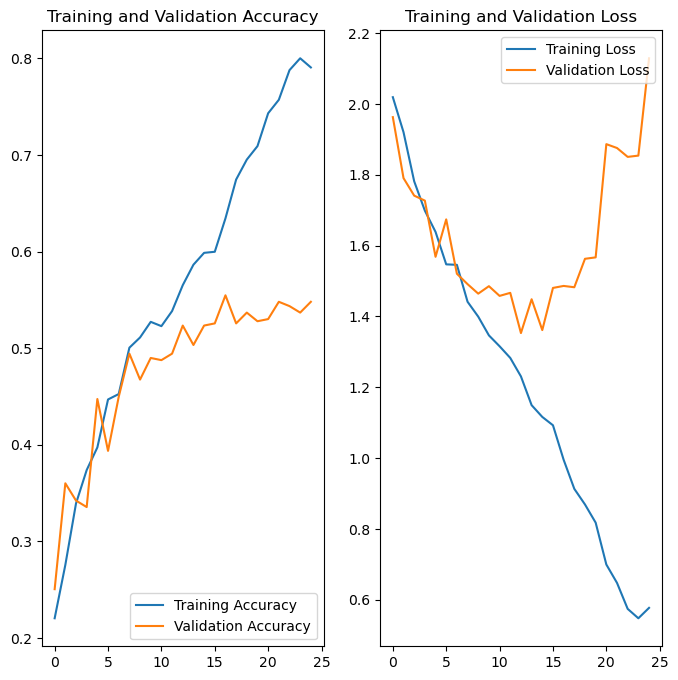

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Findings :
## The model is overfitting because we can see the difference in accuracy in training data & accuracy in the validation data that is almost 20%.

## The training accuracy is just around 70-75% with 25 epochos and the model is yet to learn the many features.

## data imbalance might be causing the bais to the model.

# Model 2 : Data Augumentation with drop out layer.

In [19]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

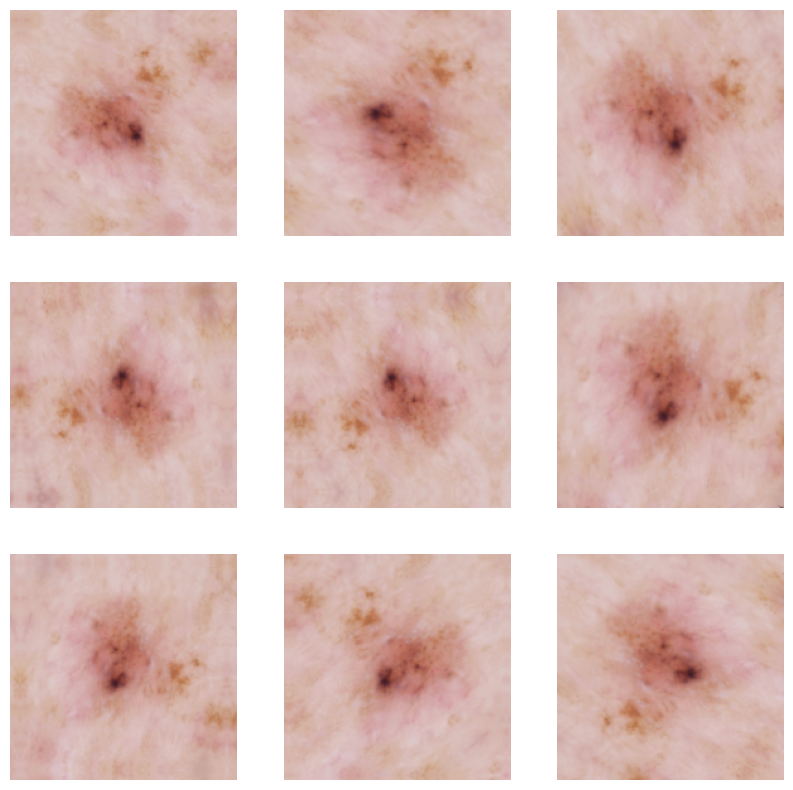

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [21]:
num_classes = 9
model = Sequential(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=(img_height,img_width,3)))

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [22]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 [==============================] - 55s 958ms/step - loss: 2.0369 - accuracy: 0.2232 - val_loss: 1.8653 - val_accuracy: 0.2998
Epoch 2/25
56/56 [==============================] - 54s 969ms/step - loss: 1.7732 - accuracy: 0.3465 - val_loss: 1.8312 - val_accuracy: 0.3199
Epoch 3/25
56/56 [==============================] - 53s 957ms/step - loss: 1.7014 - accuracy: 0.3761 - val_loss: 1.5705 - val_accuracy: 0.4452
Epoch 4/25
56/56 [==============================] - 54s 970ms/step - loss: 1.5493 - accuracy: 0.4448 - val_loss: 1.5366 - val_accuracy: 0.4787
Epoch 5/25
56/56 [==============================] - 53s 957ms/step - loss: 1.5323 - accuracy: 0.4464 - val_loss: 1.5008 - val_accuracy: 0.4631
Epoch 6/25
56/56 [==============================] - 54s 957ms/step - loss: 1.4325 - accuracy: 0.4927 - val_loss: 1.5099 - val_accuracy: 0.4899
Epoch 7/25
56/56 [==============================] - 53s 952ms/step - loss: 1.4240 - accuracy: 0.4916 - val_loss: 1.4832 - val_accuracy: 0.5011

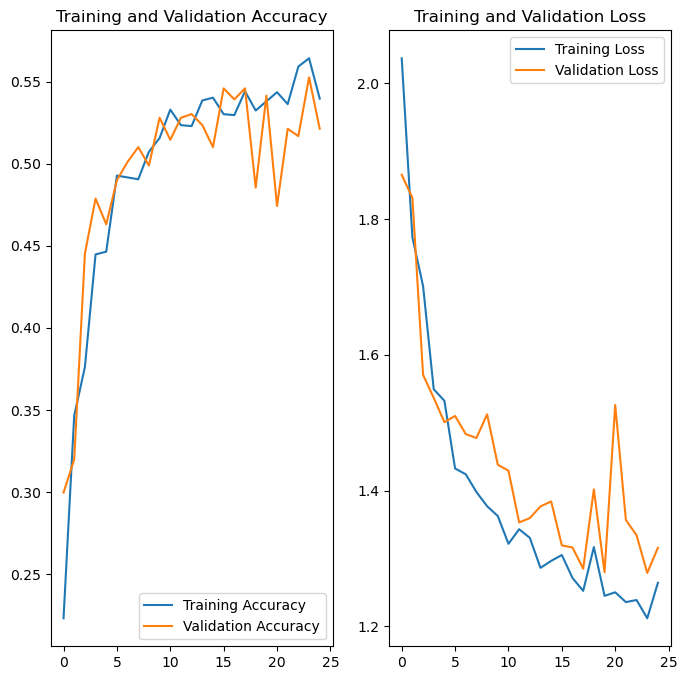

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

total training image count = 2239 

-------------------------------------
Class name =  actinic keratosis
count      =  114
proportion =  0.05091558731576597
-------------------------------------
Class name =  basal cell carcinoma
count      =  376
proportion =  0.16793211255024565
-------------------------------------
Class name =  dermatofibroma
count      =  95
proportion =  0.04242965609647164
-------------------------------------
Class name =  melanoma
count      =  438
proportion =  0.19562304600267977
-------------------------------------
Class name =  nevus
count      =  357
proportion =  0.15944618133095131
-------------------------------------
Class name =  pigmented benign keratosis
count      =  462
proportion =  0.20634211701652524
-------------------------------------
Class name =  seborrheic keratosis
count      =  77
proportion =  0.03439035283608754
-------------------------------------
Class name =  squamous cell carcinoma
count      =  181
proportion =  0.08083966056

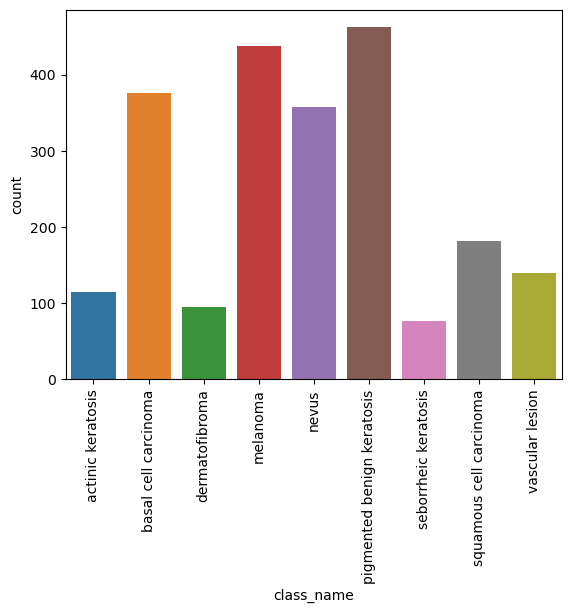

In [25]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])

temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

In [26]:
!pip install Augmentor

In [28]:
path_to_training_dataset = pathlib.Path(r'C:\Users\Sakshi\OneDrive\Desktop\Skin Data\Skin cancer ISIC The International Skin Imaging Collaboration\Train')
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset / i), output_directory='/kaggle/working/data/'+i+'/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)

Initialised with 114 image(s) found.
Output directory set to C:/kaggle/working/data/actinic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DA2748EED0>: 100%|██████████| 1000/1000 [00:08<00:00, 121.69 Samples/s]                 


Initialised with 376 image(s) found.
Output directory set to C:/kaggle/working/data/basal cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DAAFF46810>: 100%|██████████| 1000/1000 [00:07<00:00, 128.30 Samples/s]                 


Initialised with 95 image(s) found.
Output directory set to C:/kaggle/working/data/dermatofibroma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DA270B3650>: 100%|██████████| 1000/1000 [00:08<00:00, 121.47 Samples/s]                 


Initialised with 438 image(s) found.
Output directory set to C:/kaggle/working/data/melanoma/output/.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x1DAACD46510>: 100%|██████████| 1000/1000 [00:40<00:00, 24.79 Samples/s]                 


Initialised with 357 image(s) found.
Output directory set to C:/kaggle/working/data/nevus/output/.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x1DAAFF37250>: 100%|██████████| 1000/1000 [00:36<00:00, 27.53 Samples/s]                   


Initialised with 462 image(s) found.
Output directory set to C:/kaggle/working/data/pigmented benign keratosis/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1DAAD008D10>: 100%|██████████| 1000/1000 [00:07<00:00, 131.52 Samples/s]


Initialised with 77 image(s) found.
Output directory set to C:/kaggle/working/data/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1DAAD0214D0>: 100%|██████████| 1000/1000 [00:18<00:00, 55.28 Samples/s]                 


Initialised with 181 image(s) found.
Output directory set to C:/kaggle/working/data/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DA20485090>: 100%|██████████| 1000/1000 [00:09<00:00, 108.08 Samples/s]                 


Initialised with 139 image(s) found.
Output directory set to C:/kaggle/working/data/vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DAAFB379D0>: 100%|██████████| 1000/1000 [00:08<00:00, 122.92 Samples/s]                 


In [30]:
output_dir = pathlib.Path('/kaggle/working/data/')
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)

18000


total training image count = 18000 

-------------------------------------
Class name =  actinic keratosis
count      =  2000
proportion =  0.1111111111111111
-------------------------------------
Class name =  basal cell carcinoma
count      =  2000
proportion =  0.1111111111111111
-------------------------------------
Class name =  dermatofibroma
count      =  2000
proportion =  0.1111111111111111
-------------------------------------
Class name =  melanoma
count      =  2000
proportion =  0.1111111111111111
-------------------------------------
Class name =  nevus
count      =  2000
proportion =  0.1111111111111111
-------------------------------------
Class name =  pigmented benign keratosis
count      =  2000
proportion =  0.1111111111111111
-------------------------------------
Class name =  seborrheic keratosis
count      =  2000
proportion =  0.1111111111111111
-------------------------------------
Class name =  squamous cell carcinoma
count      =  2000
proportion =  0.1111111

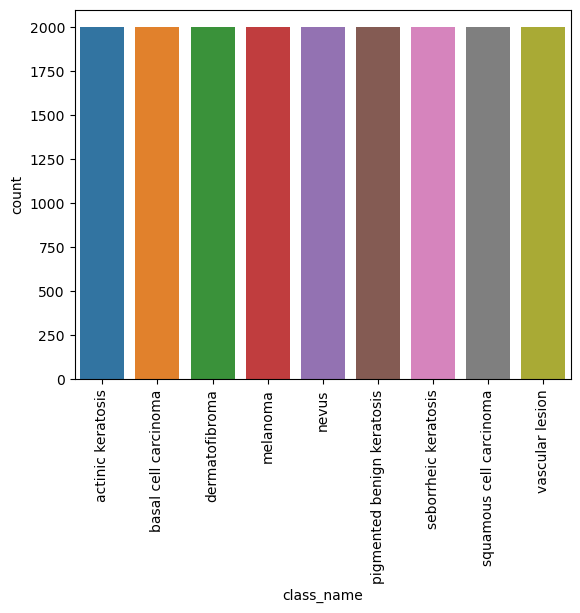

In [31]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []

for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])

temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

In [32]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18000 files belonging to 9 classes.
Using 14400 files for training.


In [33]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18000 files belonging to 9 classes.
Using 3600 files for validation.


In [34]:
print(train_ds.class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [35]:
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [36]:
opt = Adam(lr=0.001)
model.compile(optimizer= opt,
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
450/450 [==============================] - 376s 831ms/step - loss: 1.6189 - accuracy: 0.3692 - val_loss: 1.2214 - val_accuracy: 0.5531
Epoch 2/25
450/450 [==============================] - 409s 909ms/step - loss: 0.9850 - accuracy: 0.6343 - val_loss: 0.7571 - val_accuracy: 0.7303
Epoch 3/25
450/450 [==============================] - 386s 857ms/step - loss: 0.5974 - accuracy: 0.7937 - val_loss: 0.4478 - val_accuracy: 0.8558
Epoch 4/25
450/450 [==============================] - 386s 857ms/step - loss: 0.3877 - accuracy: 0.8712 - val_loss: 0.3080 - val_accuracy: 0.9067
Epoch 5/25
450/450 [==============================] - 403s 895ms/step - loss: 0.2805 - accuracy: 0.9084 - val_loss: 0.2891 - val_accuracy: 0.9097
Epoch 6/25
450/450 [==============================] - 392s 871ms/step - loss: 0.2188 - accuracy: 0.9252 - val_loss: 0.2683 - val_accuracy: 0.9231
Epoch 7/25
450/450 [==============================] - 386s 856ms/step - loss: 0.2166 - accuracy: 0.9307 - val_loss: 0.2860 -